# Exploratory Data Analysis (EDA) of Titanic dataset

This analysis will look at the Titanic dataset (available from https://github.com/datasciencedojo/datasets/blob/master/titanic.csv).

There are three main questions to answer:
1. What is the most important factor in determining survival of the Titanic incident?
2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
3. “Women and children first”. Was this the case?

In [1]:
# Import required libraries for EDA
import pandas as pd
import numpy as np

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns

import matplotlib.pyplot as plt

# Import Titanic dataset as csv and show top 5 lines
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Size of DataFrame (df)
titanic_df.shape

(891, 12)

In [3]:
# Data types and null data
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Missing data as percentage (891 entries)
titanic_df_null = titanic_df.isna().sum()
round(titanic_df_null/ 891*100,1)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            19.9
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.2
dtype: float64

### Data Overview

- The Titanic dataset has 891 entries and 12 columns (PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked)
- The datatypes are as follows:
    - int64 - PassengerId, Survived, Pclass, SibSp and Parch
    - float64 - Age and Fare
    - object - Name, Sex, Ticket, Cabin and Embarked
- Low level of missing data overall:
    - Embarked - 2 missing (0.2%)
    - Age - 177 missing (20%)
    - Cabin - 687 missing (77%)
- Two variables are not needed for the analysis, PassengerId as it is index for passengers and Cabin due to the volume of missing data

In [5]:
# Remove PassengerId and Cabin columns
titanic_df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

### 1. What is the most important factor in determining survival of the Titanic incident?

The Survived column lets us know if the passenger made it off the titanic (1) or not (0). There are four obvious columns to compare it with; passenger class (Pclass), sex, age and fare. There are two variables SipSp and Parch which determine if the passenger was on board with a sibling or spouse or a parent or child. From these it is probably worth creating a new variable to see if passengers were more likely to survive if they were onboard with family members.

Sex contains categorical data so worth creating new family variable as categorical so it is possible to compare them with a bar plot. The remaining variables are discrete data so can be compared using pairwise plot and correlation matrix 

In [6]:
# Use where function to create new 'Family' variable showing that passenger was with alone aboard the ship (0) or with family members
titanic_df['Family'] = np.where(titanic_df['SibSp'] + titanic_df['Parch'] > 0, "Family", "Alone")

(0.0, 0.85)

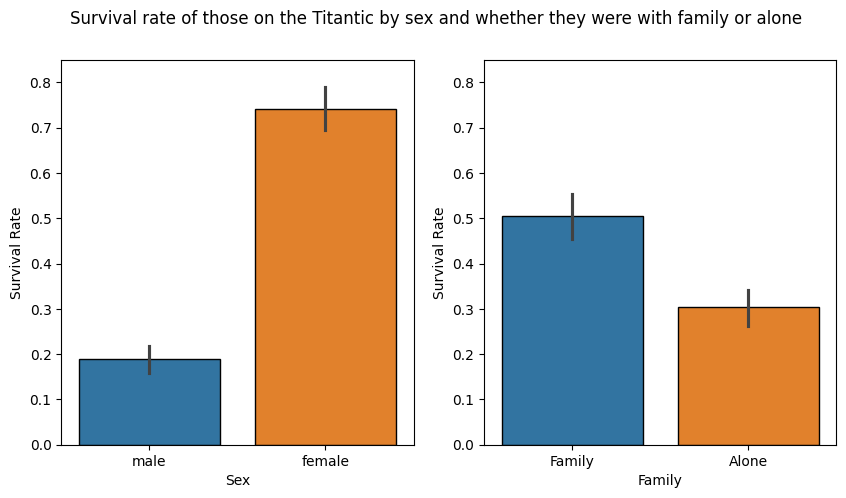

In [7]:
# Barplot to look at influence of sex on survival rate
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.barplot(data=titanic_df, x='Sex', y='Survived', hue='Sex', edgecolor='black', ax=axs[0])
sns.barplot(data=titanic_df, x='Family', y='Survived', hue='Family', edgecolor='black', ax=axs[1])
plt.suptitle("Survival rate of those on the Titantic by sex and whether they were with family or alone")
# Set y-axis to be the same range for easy of comparison of the plots 
axs[0].set_ylabel("Survival Rate")
axs[1].set_ylabel("Survival Rate")
axs[0].set_ylim(0, 0.85)
axs[1].set_ylim(0, 0.85)

The most influencial categorical variable is sex, calculate the survival rate for each for comparison with any discrete variables

In [8]:
survived_sex = titanic_df.groupby('Sex')['Survived'].mean()
survived_sex

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

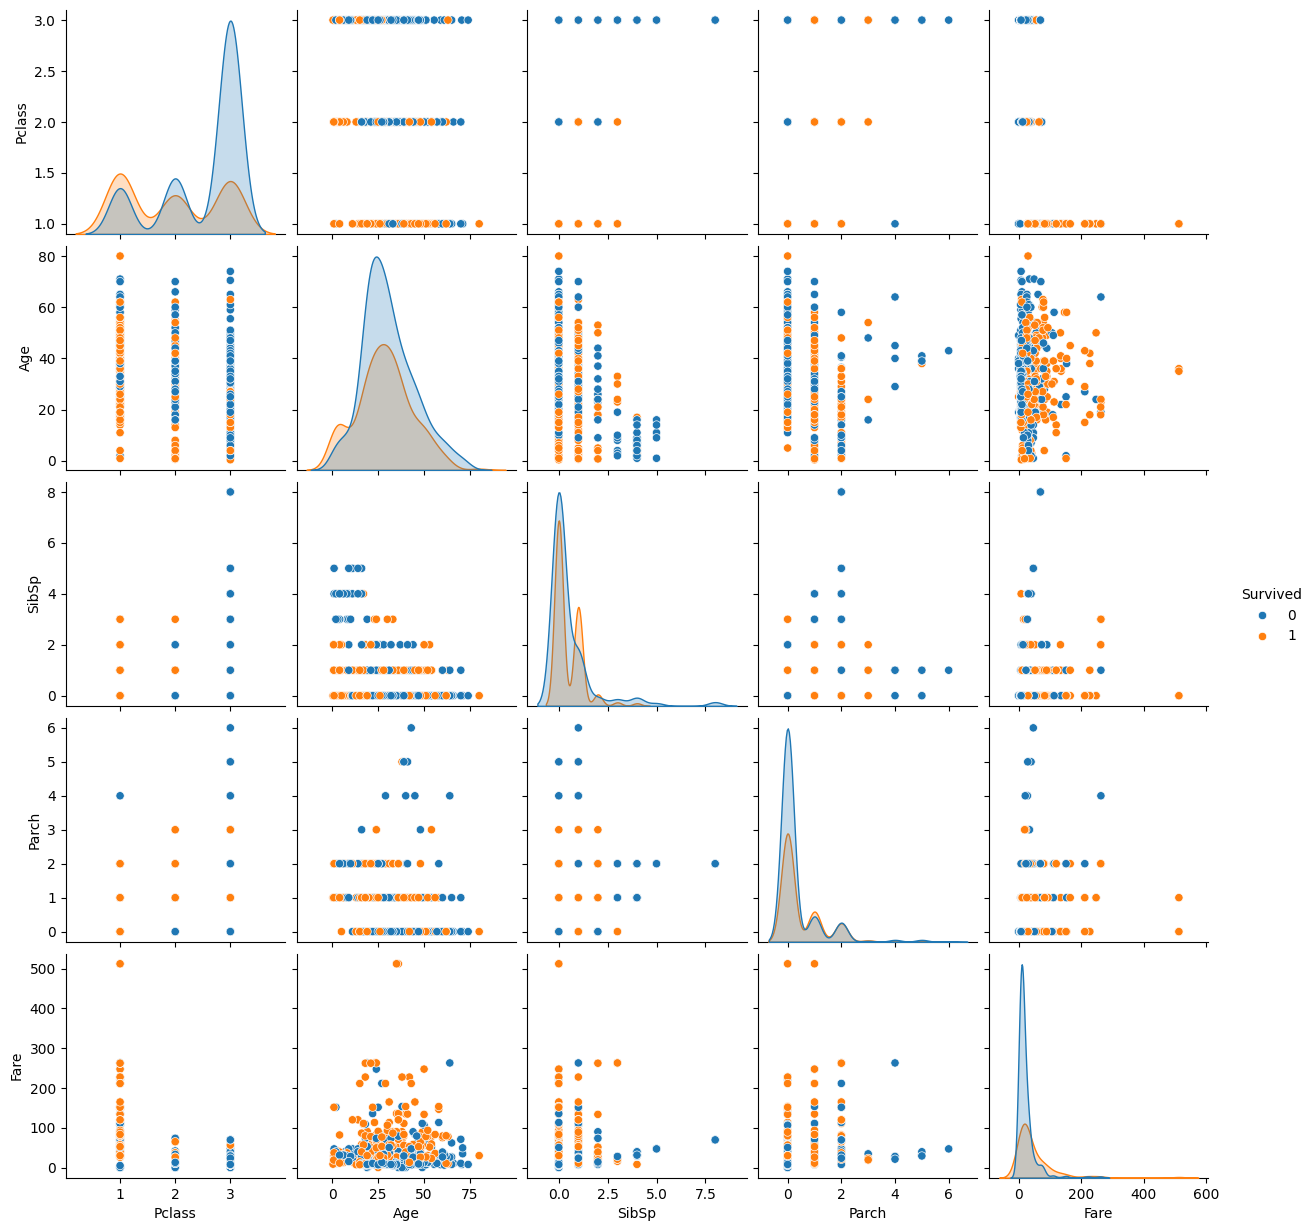

In [9]:
# Create dataframe containing only discrete variables
titanic_df_discrete = titanic_df.select_dtypes(include=[np.int64, np.float64])

# Create pairwise plot showing all discrete variables in a pair plot
sns.pairplot(titanic_df_discrete, hue='Survived')

<Axes: >

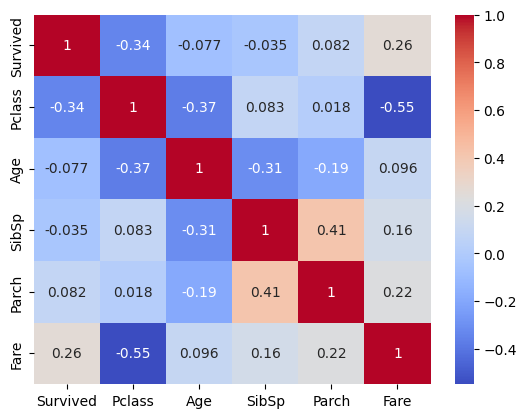

In [10]:
# Create correclation matrix of discrete variables
corr = titanic_df_discrete.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [11]:
'''
None of the variables in the correlation matrix have a large influence on 
survival as the magnitude of all correlation coefficients is less than 0.5.
The discrete variable with the biggest influence is passenger class so worth working
out the mean of each class and comparing it to the one for sex calcuated earlier.
'''
# Average survival rate by passenger class
survived_class = titanic_df.groupby('Pclass')['Survived'].mean()
survived_class

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Text(0, 0.5, 'Survival Rate')

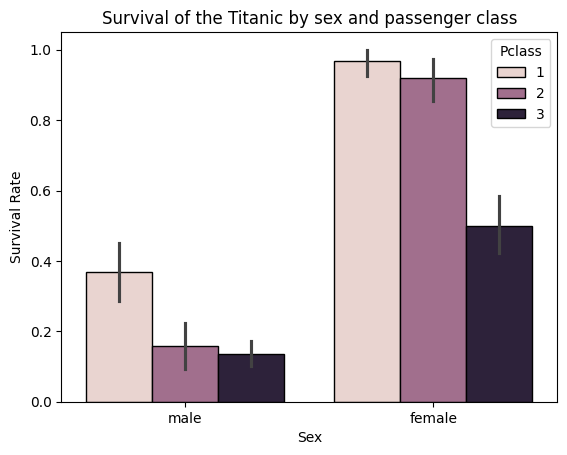

In [12]:
# Look at impact of passenger class on survival for both sexes
sns.set_palette('Set2')
sns.barplot(data=titanic_df, x='Sex', y='Survived', hue='Pclass', edgecolor='black')
plt.title("Survival of the Titanic by sex and passenger class")
plt.ylabel("Survival Rate")

In [13]:
titanic_sex_class = titanic_df.groupby(['Sex', 'Pclass'])['Survived'].mean()
titanic_sex_class

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

#### Answer

The most important factor for determining survival on board the titanic was sex and female passengers were much more likely to survive than male passengers (74% vs 19%). Whilst females from all classes were more likely to survive than their male counterparts, only half of the females in third second class survived where as your nearly all females in second and first class survived.

### 2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

We've already seen that those in 2nd and 3rd class were less likely to survive than those in first class. To check this we can compare the propotional make up of the classes on the Titanic overall and compare that to those who survived i.e. got on the liftboats. 

In [14]:
# Percentage of passengers in each class on the Titanic
titanic_class = titanic_df.groupby('Pclass')['Survived'].count()
titanic_class_per = round((titanic_class/ titanic_class.sum()) * 100, 1)
titanic_class_per

Pclass
1    24.2
2    20.7
3    55.1
Name: Survived, dtype: float64

In [15]:
# Percentage of passengers from each class who were the Titanic
# Create dataframe with those who survived the Titanic
survived_df = titanic_df[titanic_df["Survived"] == 1]
lifeboat_class = survived_df.groupby('Pclass')['Survived'].count()
lifeboat_class_per = round((lifeboat_class/ lifeboat_class.sum()) * 100, 1)
lifeboat_class_per

Pclass
1    39.8
2    25.4
3    34.8
Name: Survived, dtype: float64

#### Answer

It is clear that those who were in 1st or "upper" class were more likely to make it on to a lifeboat with nearly two-thrids (63%) surviving compared to half of those in 2nd class (47%) and a quarter in 3rd class (24%).

This is further highlighted by the make up of the lifeboats where those in 1st class accound for 40% of places where as they only account for 24% of the total passengers on the boat.

### 3. “Women and children first”. Was this the case?
The answer to the first question showed that sex was an important factor as to whether someone survived the Titanic. Age is the variable with the most missing data still within our dataset and these entries must first be removed. 
All those below 18 years old are children so age which can be used along with the sex variable to create a new passender Type which is child, women or man. This in turn can look at which type of person had the greatest survival rate and whether there was a difference between male and female children.

In [16]:
# Drop missing values
titanic_df = titanic_df.dropna(subset=['Age'])

# Create new variable 'Type' which is set to be child if the age is less than 18, women for females aged 18+ and man for males aged 18+
titanic_df['Type'] = np.where((titanic_df['Age'] >= 18), np.where(titanic_df['Sex'] == "female", "Women", "Man"), "Child")

In [17]:
# Group by person type to look at survival rate
survived_type = titanic_df.groupby('Type')['Survived'].mean()
survived_type

Type
Child    0.539823
Man      0.177215
Women    0.771845
Name: Survived, dtype: float64

In [18]:
# Look for difference between male and female children, first create dataframe with only child passengers
child_df = titanic_df[titanic_df['Type'] == "Child"]
survived_child = child_df.groupby('Sex')['Survived'].mean()
survived_child

Sex
female    0.690909
male      0.396552
Name: Survived, dtype: float64

#### Answer
It is clear that there was a priority for women and children, those under 18 years old, with three-quarters of women (77%) and half children (54%) surviving compared to less than one fifth of men (18%). The picture does not seem to be that simple though as when you look at the difference between male and female children, there is a marked difference in survival rate with considerably more girls surviving than boys (69% vs 40%).

Perhaps a more valid expression would have been "Women and girls first, with boys if we have space and men can squeeze in the sides. Oh, and ideally those from first or second class", I guess it would have been too long to shout effectively.

In [19]:
# Look at basic statistics in the dataset to find something to investigate
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


### 4. Observation

Finally for one observation from the data. The one piece of information not looked at in the dataset is the city that the passenger embarked from; Cherborg (C) , Southampton (S) or Queentown (Q) - now called Cobh in Ireland and I happen to be going in July.

It's interesting that the mean fare (34.7) is more double the meadian fare (15.8) so let's have a look at fare by embarkment city.


In [20]:
# First off update the places passengers embarked with more meaningful entries
titanic_df.replace("C", "Cherbourg", inplace=True)
titanic_df.replace("S", "Southampton", inplace=True)
titanic_df.replace("Q", "Queenstown", inplace=True)

In [21]:
# What was the make up of people getting on the Titanic in each place
titanic_embarked = titanic_df.groupby(['Embarked', 'Pclass'])['Name'].count()
titanic_embarked

Embarked     Pclass
Cherbourg    1          74
             2          15
             3          41
Queenstown   1           2
             2           2
             3          24
Southampton  1         108
             2         156
             3         290
Name: Name, dtype: int64

In [22]:
# Create datasets for each place of embarkment
titanic_cherbourg = titanic_df[titanic_df['Embarked'] == "Cherbourg"]
titanic_southampton = titanic_df[titanic_df['Embarked'] == "Southampton"]
titanic_queenstown = titanic_df[titanic_df['Embarked'] == "Queenstown"]

Text(0.5, 0, 'Place of Embarkment')

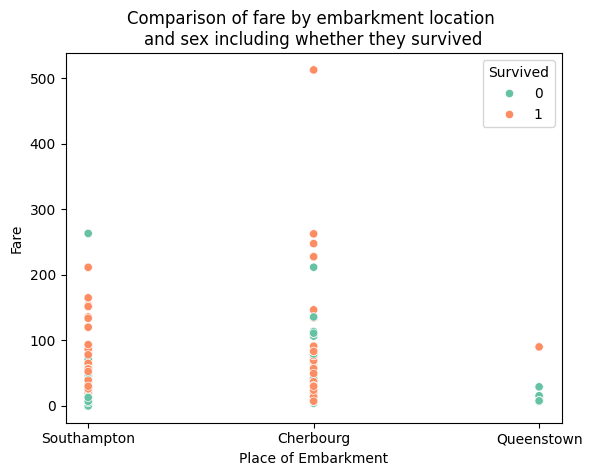

In [23]:
# Create scatter plot to show the fare and place of embarkment with whether the person surived
sns.scatterplot(data=titanic_df, x='Embarked', y='Fare', hue='Survived')
plt.title("""Comparison of fare by embarkment location 
and sex including whether they survived""")
plt.xlabel("Place of Embarkment")

In [24]:
"""
Hard to say for certain however it seems like there are two things to look at:
    1. The fare was higher for those who embarked at Cherbourg
    2. Those who embarked at Cherbourg were more likely to survive
"""
# Look at the average fare paid at each place of embarkment
fare_embarked = titanic_df.groupby(['Embarked'])['Fare'].mean()
fare_embarked

Embarked
Cherbourg      68.296767
Queenstown     18.265775
Southampton    27.476284
Name: Fare, dtype: float64

Text(0.5, 0, 'Place of Embarkment')

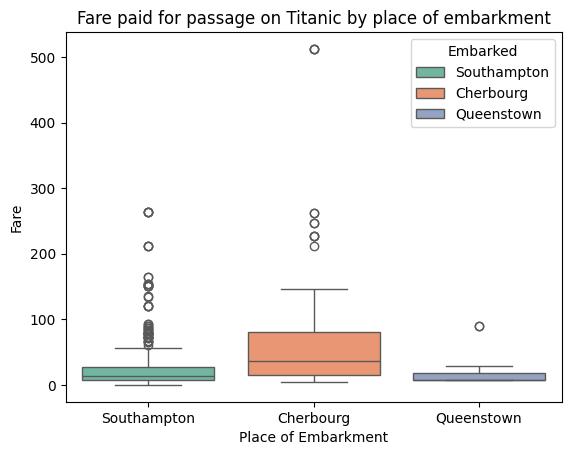

In [25]:
# Create box plot looking at fare based on place of embarkment
sns.set_palette('Set2')
sns.boxplot(data=titanic_df, x='Embarked', y='Fare', hue='Embarked')
plt.title("Fare paid for passage on Titanic by place of embarkment")
plt.xlabel("Place of Embarkment")

In [26]:
# Check how likely you were to survive depending on you place of embarkment
survived_embarked = titanic_df.groupby(['Embarked'])['Survived'].mean()
survived_embarked

Embarked
Cherbourg      0.607692
Queenstown     0.285714
Southampton    0.362816
Name: Survived, dtype: float64

Text(0.5, 0, 'Place of Embarkment')

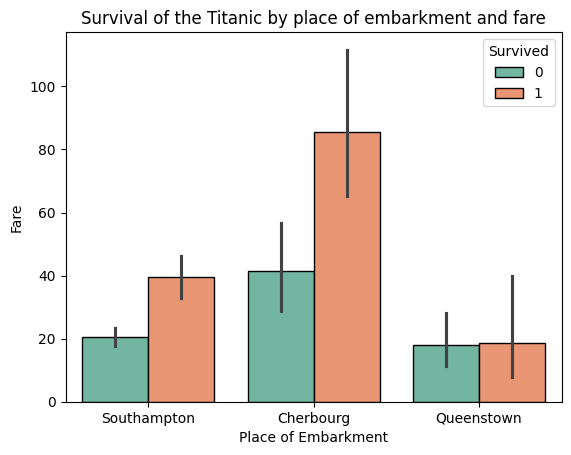

In [27]:
# Look at impact of place of embarkment on fare for those who survived and not
sns.barplot(data=titanic_df, x='Embarked', y='Fare', hue='Survived', edgecolor='black')
plt.title("Survival of the Titanic by place of embarkment and fare")
plt.xlabel("Place of Embarkment")

(0.0, 160.0)

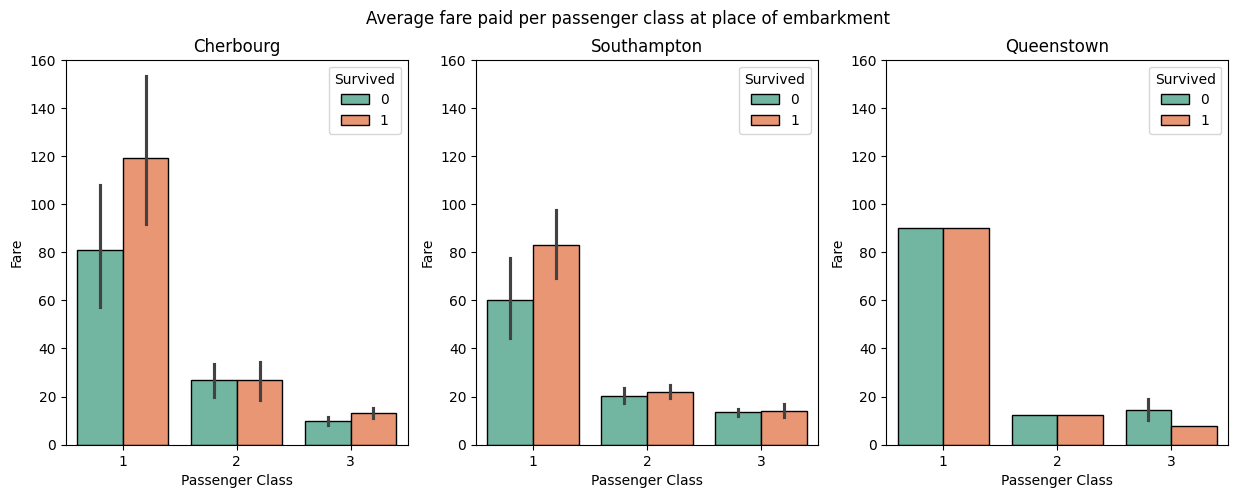

In [28]:
# Barplot to look at influence of passenger class on the fare paid split by survival across three points of embarkment
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=titanic_cherbourg, x='Pclass', y='Fare', hue='Survived', edgecolor='black', ax=axs[0])
sns.barplot(data=titanic_southampton, x='Pclass', y='Fare', hue='Survived', edgecolor='black', ax=axs[1])
sns.barplot(data=titanic_queenstown, x='Pclass', y='Fare', hue='Survived', edgecolor='black', ax=axs[2])
# Add titles, x-axis labels and set range of y-axis for ease of comparison
plt.suptitle("Average fare paid per passenger class at place of embarkment")
axs[0].set_title("Cherbourg")
axs[1].set_title("Southampton")
axs[2].set_title("Queenstown")
axs[0].set_xlabel("Passenger Class")
axs[1].set_xlabel("Passenger Class")
axs[2].set_xlabel("Passenger Class")
axs[0].set_ylim(0, 160)
axs[1].set_ylim(0, 160)
axs[2].set_ylim(0, 160)

#### Conclusion

There were three places that passengers embarked for North America on the Titanic and the proportion of passengers in first class was far higher for those who embarked at Cherbourg than Southampton or Queenstown which this was reflected in the average price paid by passengers. Those from Cherbourg paid 68.3 which was over double those from Southampton (27.5) and more than three times those from Queenstown (18.3), although there were a number of outliers when in the box plot who paid more especially for Southampton.

As may be expected given the majority of first class passengers from Cherbourg and the known higher survival rate for those in first class, two-thirds of those who embarked in Cherbourg survived (68%) making them more than twice as likely to survive than those who embarked at Southampton (27%) or Queenstown (18%). Correspondingly passengers who survived paid double the cost in both Cherbourg and Southampton. The number of passengers who embarked at Queenstown is small in comparison with very few first or second class passengers making comparisons less meaningful.

Looking further still, there is a clear fare different within first class with those who survived paying more in Cherbourg and Southampton. This phenomenon is not repeated elsewhere in the data suggesting potentially that those with more money in within first class were able to access places on lifeboats either though higher social standing on the vessel or you could imagine how someone might bribe their way on.
